In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_url = 'train.csv'
test_url = 'test.csv'

In [3]:
df = pd.read_csv(train_url)
print(df.shape)
df.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

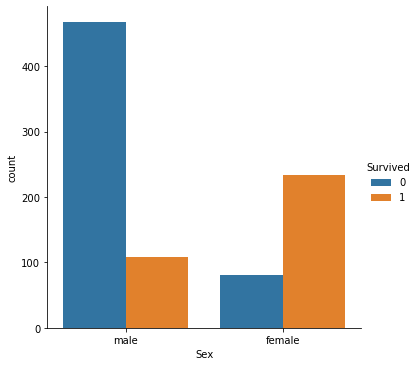

In [6]:
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = df);

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Filling missing values

 1. **Age:**

 It is not very accurate to replace the missing values of age with the mean or median. As such, looking at the correlation heatmap above, the 2 factors most associated with age is Pclass and SibSp. Hence, I would first differentiate our dataset by their social-economic status and number of siblings/spouses they are on board with. I would then use the median of each subset as the replacement for the respective missing values.



In [9]:
titanic_1=df.groupby(["Pclass","SibSp"])
titanic_1_median=titanic_1.median()
titanic_1_median

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500



In the following function, the medians of each group would be used to replace missing values in the "Age" based on their groups (Pclass and SibSp)


In [10]:
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()  #I used the median age of Pclass=3 as a replacement as there is no median value for SibSp=8 in training dataset

df["Age"]=df["Age"].fillna(fill_age(df,titanic_1_median))

2. **Cabin:**

Since the cabin location would logically affect their ability to evacuate and survive, it is also not appropriate to assign the missing cabin values randomly. Instead, it's better we assign them Cabin U (U for unknown).


In [11]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df["Cabin"]=df["Cabin"].fillna("U")
df["Cabin"]=df["Cabin"].map(lambda x: x[0])

In [14]:
def new_cabin_features(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)  
    #Cabin U is when the rest of cabins are 0
    

new_cabin_features(df)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,0,0,0,0,0,0,0,0


In [16]:
df.shape

(891, 20)

## EDA Plots

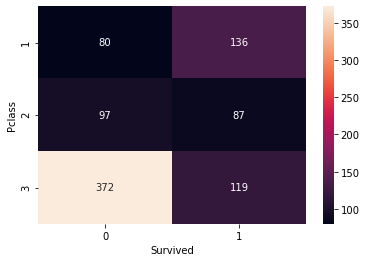

In [17]:
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
  
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d");

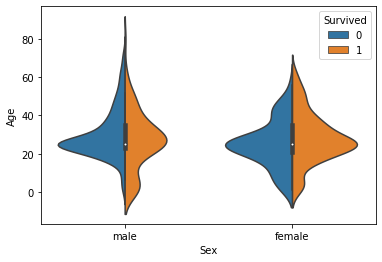

In [18]:
# Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df, split = True);

In [19]:
map_sex = {
    'female': 1, 
    'male': 0
}

df.Sex = df.Sex.map(map_sex)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin A        0
Cabin B        0
Cabin C        0
Cabin D        0
Cabin E        0
Cabin F        0
Cabin G        0
Cabin T        0
dtype: int64

In [21]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

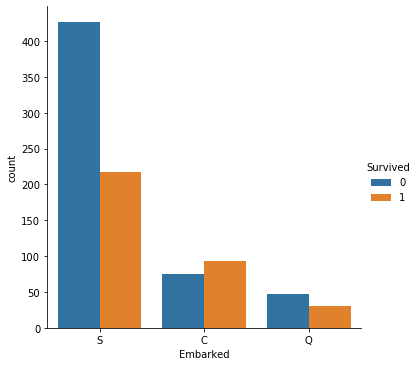

In [22]:
sns.catplot(x ="Embarked", hue ="Survived", 
kind ="count", data = df);

In [23]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [24]:
map_embarked = {
    'C': 2,
    'Q': 1,
    'S': 0
}

df['Embarked'] = df['Embarked'].map(map_embarked)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0.0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2.0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0.0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,0.0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0.0,0,0,0,0,0,0,0,0


## Model fitting

In [26]:
df.dropna(axis=0, inplace=True)
y = df.Survived
X = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)

In [27]:
X.shape, y.shape

((889, 15), (889,))

In [28]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T
0,3,0,22.0,1,0,7.2500,0.0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,2.0,0,0,1,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0.0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.0,0,0,1,0,0,0,0,0
4,3,0,35.0,0,0,8.0500,0.0,0,0,0,0,0,0,0,0


In [29]:
Means = X.mean()
Std = X.std()

In [30]:
def normalise(X):
    return (X - Means)/Std

In [31]:
X_norm = normalise(X)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.2,random_state=15)

### Linear SVM

In [34]:
model = svm.SVC(C=1, kernel='linear')
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [35]:
def pred_accuracy(model, X, y):
    y_hat = model.predict(X)
    return metrics.accuracy_score(y, y_hat)*100

In [36]:
pred_accuracy(model, X_train, y_train), pred_accuracy(model, X_val, y_val)

(78.48101265822784, 80.89887640449437)

## RBF SVM

In [37]:
model = svm.SVC(C=1, kernel='rbf', gamma='auto')
model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [38]:
pred_accuracy(model, X_train, y_train), pred_accuracy(model, X_val, y_val)

(82.9817158931083, 83.70786516853933)

## Grid Search CV

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(X_norm)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.2,random_state=15)

**Linear SVM**

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = [{
    'C': [0.001, 0.05, 0.01, 0.5, 0.1, 5, 1, 50, 10, 500, 100, 1000],
    'kernel': ['linear']
}]

In [43]:
gs_lin = GridSearchCV(svm.SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_lin.fit(X_train, y_train)
gs_lin.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [44]:
gs_lin.score(X_train, y_train), gs_lin.score(X_val, y_val)

(0.8270042194092827, 0.8370786516853933)

**RBF SVM**

In [45]:
params = [{
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['rbf'],
    'gamma': ['scale','auto']
}]

In [46]:
gs_rbf = GridSearchCV(svm.SVC(),
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

gs_rbf.fit(X_train, y_train)
gs_rbf.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [47]:
gs_rbf.score(X_train, y_train), gs_rbf.score(X_val, y_val)

(0.8762306610407876, 0.8314606741573034)

## Making predictions on test set

In [48]:
df_test = pd.read_csv(test_url)

In [49]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
df_test.shape

(418, 11)

In [51]:
df_test.Sex = df_test.Sex.map(map_sex)

In [52]:
df_test["Cabin"]=df_test["Cabin"].fillna("U")
df_test["Cabin"]=df_test["Cabin"].map(lambda x: x[0])
new_cabin_features(df_test)

In [53]:
df_test['Embarked'] = df_test['Embarked'].map(map_embarked)

In [54]:
df_test["Age"]=df_test["Age"].fillna(fill_age(df_test,titanic_1_median))

In [55]:
def fill_fare(df):
    for x in range(len(df)):
        return med_arr[df['Pclass'][x]]

In [56]:
med_arr = df_test.groupby(['Pclass'])['Fare'].median()
df_test['Fare']=df_test['Fare'].fillna(fill_fare(df_test))

In [57]:
df_test.drop(columns=['PassengerId','Name','Ticket', 'Cabin'], axis=1, inplace=True)

In [58]:
X_test = normalise(df_test)

In [59]:
X_test_poly = poly.fit_transform(X_test)
X_test_poly.shape

(418, 136)

In [60]:
y_test_lin = gs_lin.predict(X_test_poly)
y_test_rbf = gs_rbf.predict(X_test_poly)

In [61]:
Lin_pred = pd.DataFrame({
    'predictions': y_test_lin
})
Lin_pred.to_csv('LinSVM_ME19B197.csv', index=False)

RBF_pred = pd.DataFrame({
    'predictions': y_test_rbf
})
Lin_pred.to_csv('RBFSVM_ME19B197.csv', index=False)